# Cluster Analysis




In [1]:
import sys
sys.path.append("..")
from benchmark.datasets import get_dataset
from benchmark.results import load_all_results
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Timing analysis

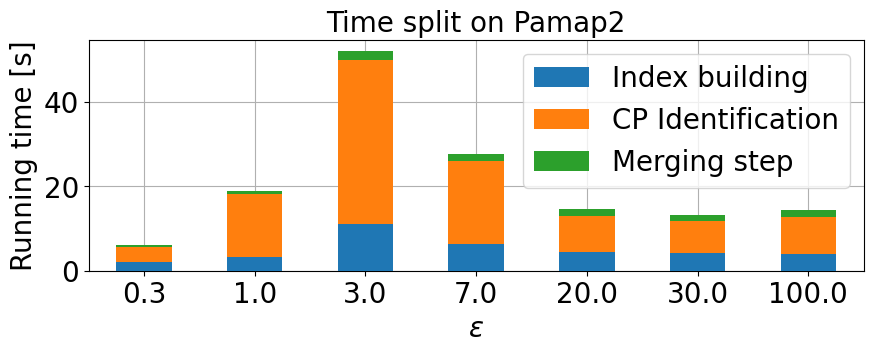

In [2]:
data = []

dataset = "pamap2"  # "aloi" | "celeba" | "census" | "mnist" | "pamap2"

for f in load_all_results(dataset, ".."):
   if f.attrs['algo'] == "srrdbscan" and "level_0" in f.attrs:
      if "delta=0.1" not in f.attrs['params']:
         continue
      #if "approx" in f.attrs['params']:
      #   continue
      if "approx=1.0" not in f.attrs['params']:
         continue
      if f.attrs['eps'] not in [0.3, 1.0, 3.0, 7.0, 20, 30, 100]:
         continue
      if f.attrs['minPts'] != 100:
         continue
      data.append({
         "eps": round(f.attrs['eps'],2),
         "minPts": f.attrs['minPts'],
         "time_total": f.attrs['timing_total'],
         "Merging step": f.attrs['timing_merging'],
         "Index building": f.attrs['timing_build ht'],
         "CP Identification": f.attrs['timing_identify cp'],
      })

df = pd.DataFrame(data=data)

ax = df[[ 'Index building', 'CP Identification','Merging step', 'eps']].sort_values(by='eps').plot.bar(x='eps', rot=0, stacked=True, zorder=3, figsize=(10, 3))
ax.grid(zorder=0)
ax.set_title(f"Time split on {dataset.title()}", fontsize=20)
ax.set_ylabel(f"Running time [s]", fontsize=20)
ax.set_xlabel(r"$\varepsilon$", fontsize=20)
ax.xaxis.set_tick_params(labelsize = 20)
ax.yaxis.set_tick_params(labelsize = 20)
plt.legend(fontsize=20)
# plt.savefig(f"{dataset}.png")

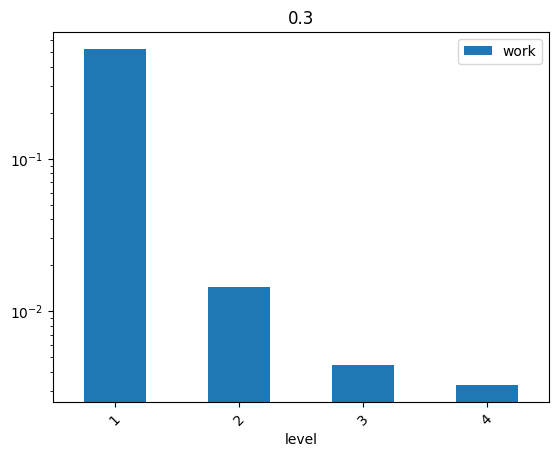

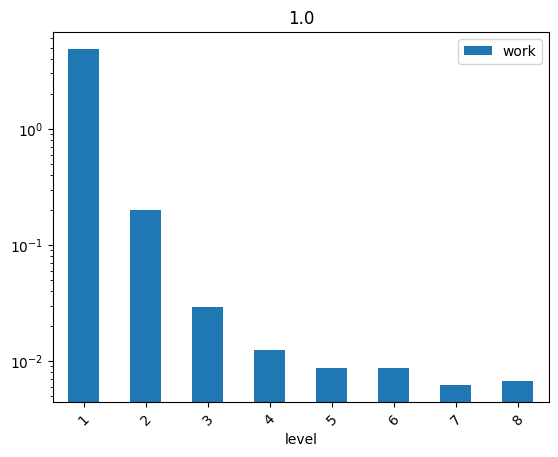

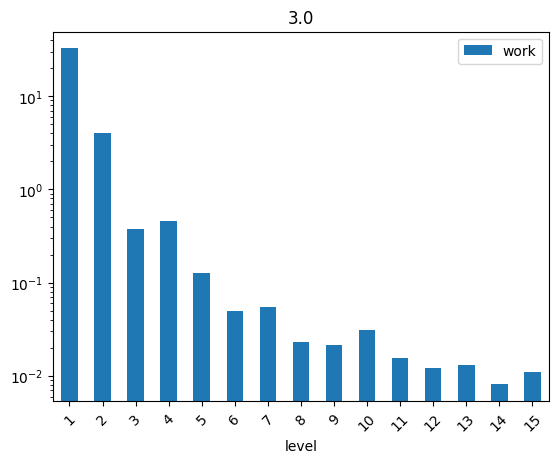

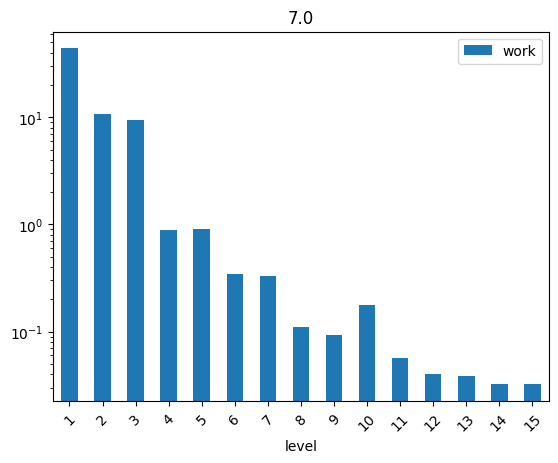

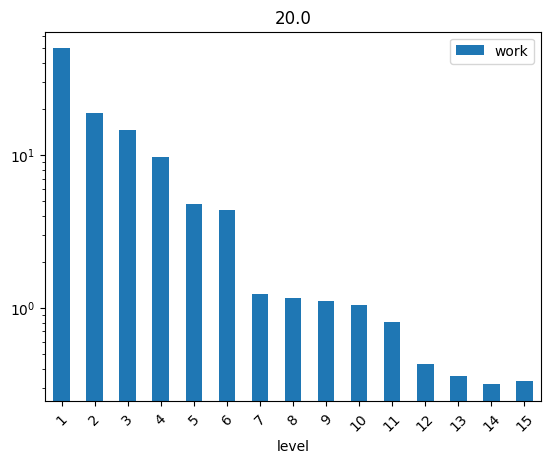

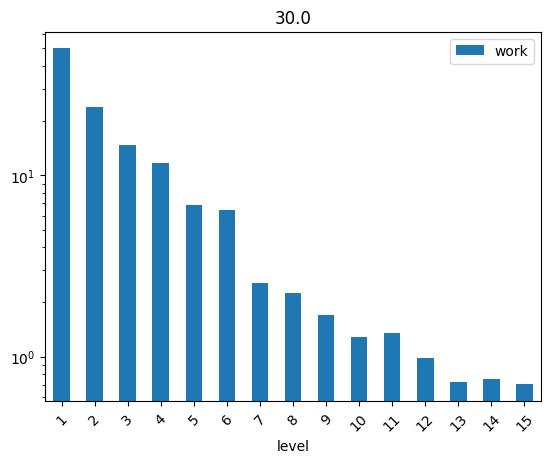

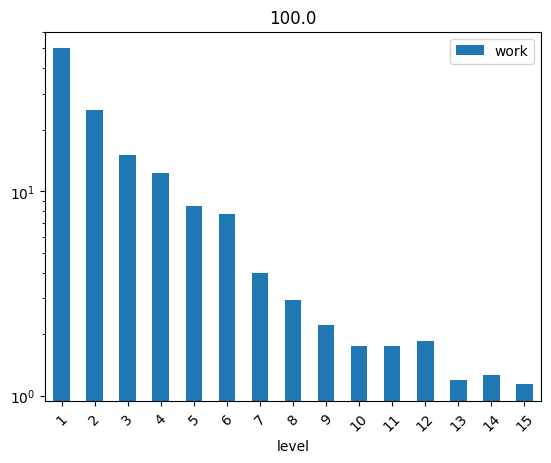

In [3]:
data = []
X = get_dataset(f"{dataset}", "..")["data"]

for f in load_all_results(dataset, ".."):
   if f.attrs['algo'] == "srrdbscan" and "level_0" in f.attrs and "delta=0.1" in f.attrs['params'] and "approx=1.0" in f.attrs['params'] and f.attrs['minPts'] == 100:
      if f.attrs['eps'] not in [0.3, 1.0, 3.0, 7.0, 20, 30, 100]:
         continue
      levels = [x for x in f.attrs if x.startswith("merge_level_")]
      for level in levels:
        data.append({
            "eps": round(f.attrs['eps'], 1),
            "level": int(level.split("_")[-1]) + 1,
            "work": 100 * int(f.attrs[level]) / X.shape[0]**2,
        })

df = pd.DataFrame(data=data)
df
for eps in sorted(set(df["eps"].values)):
    ax = df[df.eps == eps][['level', 'work',]].sort_values(by='level').plot.bar(x='level', rot=45, stacked=True, title=eps)
    #ax.set_yticks([0, 10, 100])
    #ax.set_ylim([0, 100])
    ax.set_yscale("log")


Text(0.5, 0, '$\\varepsilon$')

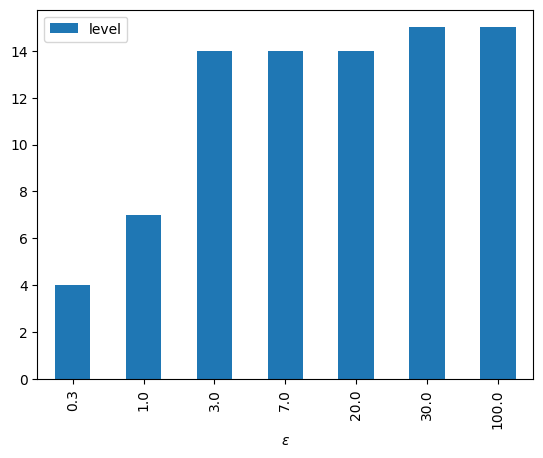

In [4]:
indx = df.groupby('eps')['work'].idxmin()
df.loc[indx]
ax = df.loc[indx].plot.bar(x='eps', y = "level")
ax.set_xlabel(r"$\varepsilon$")

#ax2 = ax.twinx()
#ax2.spines['right'].set_position(('axes', 1.0))
#df.loc[indx].plot.bar(ax=ax2, x='eps', y = "work")

<Axes: title={'center': '100.0'}, xlabel='level'>

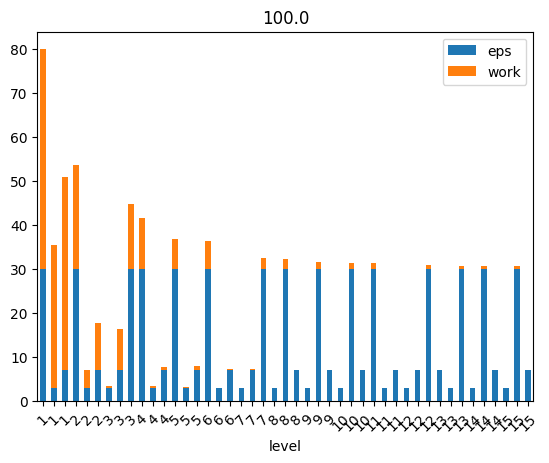

In [5]:
df[df.eps.isin([3, 7, 30])][['eps', 'level', 'work',]].sort_values(by='level').plot.bar(x='level', rot=45, stacked=True, title=eps)


<Axes: xlabel='level'>

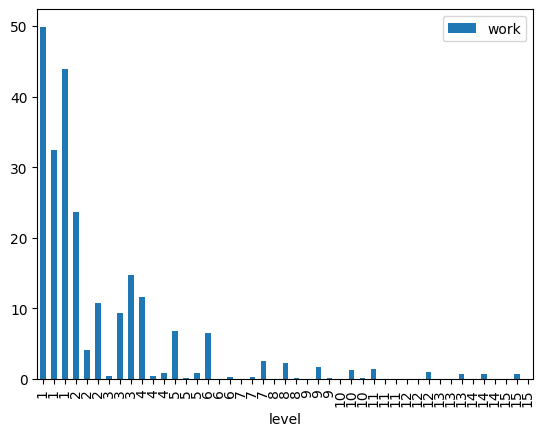

In [6]:
df[df.eps.isin([3, 7, 30])][['eps', 'level', 'work',]].sort_values(by='level').plot.bar(x="level", y="work",stacked=True)

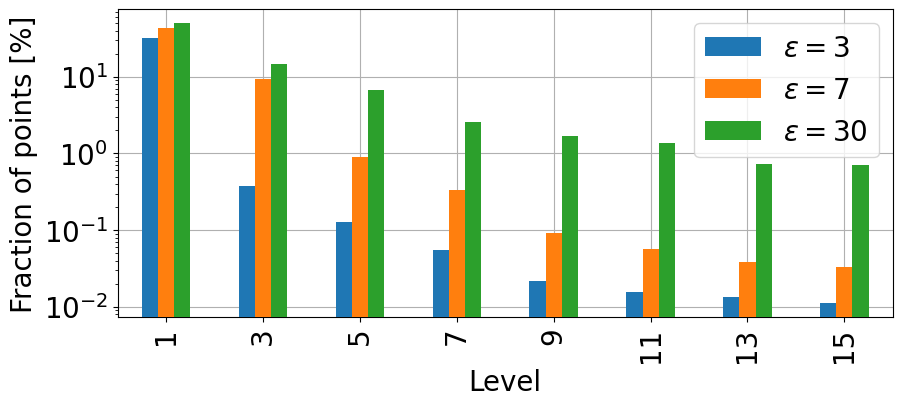

In [7]:
plot_df = df[df.eps == 30.0].merge(df[df.eps == 3], on="level").merge(df[df.eps == 7], on="level")[["level",  "work_y", "work", "work_x"]].sort_values("level")
plot_df = plot_df[plot_df['level'] % 2 == 1]
plot_df = plot_df.rename(columns={"work_y": r"$\varepsilon = 3$", "work": r"$\varepsilon = 7$", "work_x": r"$\varepsilon = 30$"})
ax = plot_df.plot.bar(x = "level", zorder=3, figsize=(10, 4))
ax.grid(zorder=0)

ax.set_yscale('log')

ax.set_xlabel("Level", fontsize=20)
ax.set_ylabel('Fraction of points [%]', fontsize=20)
ax.xaxis.set_tick_params(labelsize = 20)
ax.yaxis.set_tick_params(labelsize = 20)
plt.legend(fontsize=20)

In [8]:
df[df.eps == 30.0].merge(df[df.eps == 3], on="level").merge(df[df.eps == 7], on="level")

,eps_x,level,work_x,eps_y,work_y,eps,work
0,30.0,1,49.910868,3.0,32.416481,7.0,43.899040
1,30.0,2,23.633894,3.0,4.050428,7.0,10.770176
2,30.0,11,1.349813,3.0,0.015535,7.0,0.056911
3,30.0,12,0.988521,3.0,0.012071,7.0,0.040208
4,30.0,13,0.725434,3.0,0.013248,7.0,0.038539
5,30.0,14,0.750159,3.0,0.008114,7.0,0.032108
6,30.0,15,0.703911,3.0,0.011065,7.0,0.032505
7,30.0,3,14.703397,3.0,0.377961,7.0,9.369546
8,30.0,4,11.653341,3.0,0.457935,7.0,0.888062
9,30.0,5,6.822761,3.0,0.127786,7.0,0.911624
